# Parameter Optimisation

In [37]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import random as r
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load Dataset
df = pd.read_excel("Dry_Bean_Dataset.xlsx")

In [3]:
#Lbel encoding of the target variable
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

In [4]:
#created 10 samples out of the original dataset
samples = [group for _, group in df.sample(frac=1).groupby(np.arange(len(df)) // (len(df) // 10))]

In [5]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3


In [6]:
#SVM implementation for multi-class classification
def fitness(k,n,e,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    clf = svm.NuSVR(nu=n, kernel=k)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test).round()
    
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [7]:
#Get the best parameters when iterated 100 times
def best_parameter(sample):
    X = sample.drop(columns=['Class'])
    y = sample['Class']
    best_acc=0
    best_ker=""
    best_nu=0
    best_ep=0
    iteration=100
    kernel_list=['linear','rbf','poly','sigmoid']
    for i in range(iteration):
        k=r.sample(kernel_list,1)[0]
        n=r.random()
        e=r.random()
        accuracy=fitness(k,n,e,X,y)

        if accuracy>best_acc:
            best_ker=k
            best_nu=n
            best_ep=e
            best_acc=accuracy
    return best_acc, best_ker, best_nu, best_ep

In [9]:
sp=["S1","S2","S3","S4","S5","S6","S7","S8","S9","S10"]
ba=[]
bk=[]
bn=[]
be=[]
for i, sample_df in enumerate(samples):
    best_acc, best_ker, best_nu, best_ep=best_parameter(sample_df)
    ba.append(best_acc)
    bk.append(best_ker)
    bn.append(best_nu)
    be.append(best_ep)
    
data={'Sample':sp,'Best Accuracy':ba,'Best Kernel':bk,'Best Nu':bn,'Best Epsilon':be}
df1 = pd.DataFrame(data)

In [27]:
df1

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,S1,0.273839,poly,0.004248,0.058403
1,S2,0.273839,rbf,0.500496,0.200388
2,S3,0.268949,rbf,0.839442,0.962886
3,S4,0.237164,rbf,0.299442,0.492668
4,S5,0.256724,rbf,0.119852,0.453732
5,S6,0.151589,poly,0.948428,0.920015
6,S7,0.224939,rbf,0.292264,0.451409
7,S8,0.220049,rbf,0.137243,0.476350
8,S9,0.283619,poly,0.988280,0.170195
9,S10,0.029340,sigmoid,0.186590,0.854817


In [26]:
df1.to_csv("Result.csv",index=False)

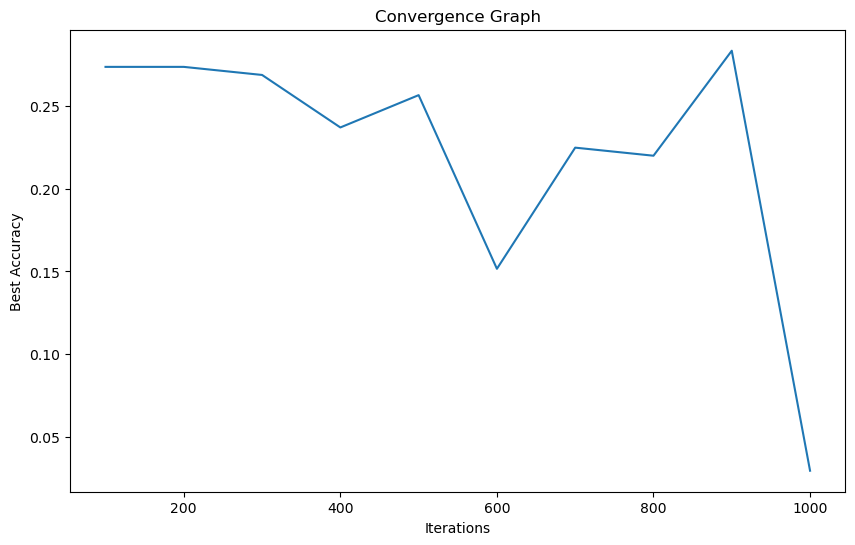

In [39]:
#Convergence Graph

itera=[100,200,300,400,500,600,700,800,900,1000]
plt.figure(figsize=(10, 6)) 
sns.lineplot(x=itera, y=df1['Best Accuracy'])
plt.title('Convergence Graph')
plt.xlabel('Iterations')
plt.ylabel('Best Accuracy')
plt.savefig('line_plot.png')
plt.show()